# Imports

In [ ]:
import numpy as np
import tensorflow as tf
import keras

from IPython.core.display import display

from keras.preprocessing.image import img_to_array, load_img
from keras.applications.inception_resnet_v2 import InceptionResNetV2, decode_predictions, preprocess_input

from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import decode_predictions as decode_vgg19
from keras.applications.vgg19 import preprocess_input as preprocess_vgg19



# Constants

In [ ]:
FILE_1 = '01 Umbrella.jpg'
FILE_2 = '02 Couple.jpg'
FILE_3 = '03 Ocean.jpg'

# Preprocessing Images

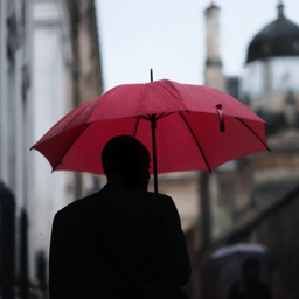

In [ ]:
pic = load_img(FILE_1, target_size = (299,299))
display(pic)

In [ ]:
pic_array = img_to_array(pic)
pic_array.shape

(299, 299, 3)

In [ ]:
expanded = np.expand_dims(pic_array,axis=0)
expanded.shape

(1, 299, 299, 3)

In [ ]:
preprocessed = preprocess_input(expanded)

Creating function to preprocess

In [ ]:
def format_img_inceptionresnet(filename):
  pic = load_img(filename, target_size = (299,299))
  pic_arr = img_to_array(pic)
  expanded = np.expand_dims(pic_arr,axis =0)
  return preprocess_input(expanded)

In [ ]:
def format_img_vgg19(filename):
  pic = load_img(filename, target_size = (224,224))
  pic_arr = img_to_array(pic)
  expanded = np.expand_dims(pic_arr,axis =0)
  return preprocess_vgg19(expanded)

Trying Various Pretrained Models

# Loading InceptionResNet

In [ ]:
inception_model = InceptionResNetV2(weights = 'imagenet')

225214464/225209952 [==============================] - 3s 0us/step


In [ ]:
#inception_model.graph = tf.get_default_graph()

# Making Predictions

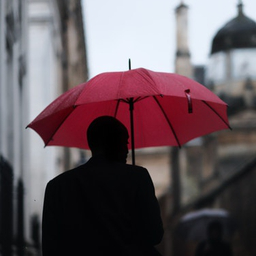

[[('n04507155', 'umbrella', 0.82924366),
  ('n03792972', 'mountain_tent', 0.0012268272),
  ('n04479046', 'trench_coat', 0.0011062962),
  ('n03788195', 'mosque', 0.0010572362),
  ('n03220513', 'dome', 0.0010310994)]]

In [ ]:
prediction = inception_model.predict(preprocessed)
display(load_img(FILE_1))
decode_predictions(prediction)

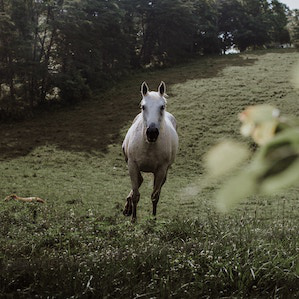

[[('n02389026', 'sorrel', 0.4483173),
  ('n02412080', 'ram', 0.029898994),
  ('n02106030', 'collie', 0.01969456),
  ('n04604644', 'worm_fence', 0.016888157),
  ('n04049303', 'rain_barrel', 0.013531385)]]

In [ ]:
data = format_img_inceptionresnet('04 Horse.jpg')
prediction = inception_model.predict(data)
display(load_img('04 Horse.jpg'))
decode_predictions(prediction)

# Testing VGG19 Model

Loading VGG19

In [ ]:
vgg19_model = VGG19()

574717952/574710816 [==============================] - 3s 0us/step


Making Predictions

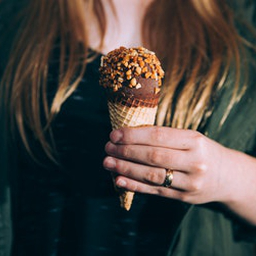

[[('n03724870', 'mask', 0.19834381),
  ('n01943899', 'conch', 0.09400181),
  ('n04259630', 'sombrero', 0.083224304),
  ('n03720891', 'maraca', 0.044131372),
  ('n04584207', 'wig', 0.04016947)]]

In [ ]:
data = format_img_vgg19('09 Ice Cream.jpg')
prediction = vgg19_model.predict(data)
display(load_img('09 Ice Cream.jpg'))
decode_vgg19(prediction)
